## **Housing Classification: OneHotEncoding, OrdinalEncoding**

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
house_data = pd.read_csv('housing-classification-iter4.csv')
house_data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu
0,8450,65.0,856,3,0,0,2,0,0,0,...,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,NaN
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Y,CBlock,TA,TA,Gd,TA,Gd,ALQ,TA,TA
2,11250,68.0,920,3,1,0,2,0,0,0,...,Y,PConc,Gd,TA,Gd,TA,Mn,GLQ,Gd,TA
3,9550,60.0,756,3,1,0,3,0,0,0,...,Y,BrkTil,TA,TA,TA,Gd,No,ALQ,Gd,Gd
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Y,PConc,Gd,TA,Gd,TA,Av,GLQ,Gd,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,...,Y,PConc,TA,TA,Gd,TA,No,Unf,TA,TA
1456,13175,85.0,1542,3,2,0,2,349,0,0,...,Y,CBlock,TA,TA,Gd,TA,No,ALQ,TA,TA
1457,9042,66.0,1152,4,2,0,1,0,0,1,...,Y,Stone,Ex,Gd,TA,Gd,No,GLQ,Gd,Gd
1458,9717,68.0,1078,2,0,0,1,366,0,0,...,Y,CBlock,TA,TA,TA,TA,Mn,GLQ,Gd,NaN


In [3]:
house_data.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
MSZoning          0
Condition1        0
Heating           0
Street            0
CentralAir        0
Foundation        0
ExterQual         0
ExterCond         0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
KitchenQual       0
FireplaceQu     690
dtype: int64

##### **Split Data**

In [4]:
X = house_data.drop('Expensive', axis=1)
y = house_data.pop('Expensive')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

##### **Prepare the Training Set**

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 133 to 792
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1168 non-null   int64  
 1   LotFrontage   968 non-null    float64
 2   TotalBsmtSF   1168 non-null   int64  
 3   BedroomAbvGr  1168 non-null   int64  
 4   Fireplaces    1168 non-null   int64  
 5   PoolArea      1168 non-null   int64  
 6   GarageCars    1168 non-null   int64  
 7   WoodDeckSF    1168 non-null   int64  
 8   ScreenPorch   1168 non-null   int64  
 9   MSZoning      1168 non-null   object 
 10  Condition1    1168 non-null   object 
 11  Heating       1168 non-null   object 
 12  Street        1168 non-null   object 
 13  CentralAir    1168 non-null   object 
 14  Foundation    1168 non-null   object 
 15  ExterQual     1168 non-null   object 
 16  ExterCond     1168 non-null   object 
 17  BsmtQual      1137 non-null   object 
 18  BsmtCond      1137 non-null

In [7]:
X_train_num = X_train.select_dtypes(exclude='object')
X_train_num

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
133,6853,NaN,1267,2,0,0,2,192,0
290,15611,120.0,1079,3,1,0,2,0,0
24,8246,NaN,1060,3,1,0,1,406,0
1093,9230,71.0,864,1,0,0,2,0,0
1288,5664,40.0,1501,2,1,0,2,212,0
...,...,...,...,...,...,...,...,...,...
802,8199,63.0,728,3,1,0,2,36,0
53,50271,68.0,1842,0,1,0,3,857,0
350,7820,68.0,1869,2,1,0,2,210,0
79,10440,60.0,440,2,0,0,2,74,0


In [8]:
X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 133 to 792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1168 non-null   int64  
 1   LotFrontage   968 non-null    float64
 2   TotalBsmtSF   1168 non-null   int64  
 3   BedroomAbvGr  1168 non-null   int64  
 4   Fireplaces    1168 non-null   int64  
 5   PoolArea      1168 non-null   int64  
 6   GarageCars    1168 non-null   int64  
 7   WoodDeckSF    1168 non-null   int64  
 8   ScreenPorch   1168 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 91.2 KB


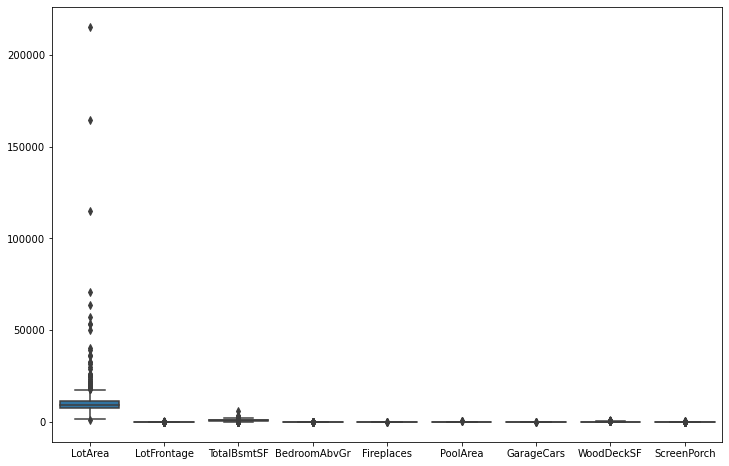

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train_num)
plt.show();

In [10]:
X_train_ord = X_train.iloc[:, 15:]
X_train_ord

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu
133,Gd,TA,Ex,TA,No,GLQ,Gd,NaN
290,Gd,TA,Gd,TA,Av,Unf,Gd,Gd
24,TA,Gd,TA,TA,Mn,Rec,Gd,TA
1093,TA,TA,TA,TA,Mn,GLQ,Gd,NaN
1288,Gd,TA,Gd,TA,No,GLQ,Ex,Ex
...,...,...,...,...,...,...,...,...
802,Gd,TA,Gd,TA,Av,GLQ,Gd,Gd
53,Gd,TA,Ex,TA,Gd,GLQ,Gd,Gd
350,Ex,TA,Ex,TA,No,Unf,Ex,Gd
79,TA,TA,TA,TA,No,Unf,TA,NaN


In [11]:
X_train_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 133 to 792
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ExterQual     1168 non-null   object
 1   ExterCond     1168 non-null   object
 2   BsmtQual      1137 non-null   object
 3   BsmtCond      1137 non-null   object
 4   BsmtExposure  1136 non-null   object
 5   BsmtFinType1  1137 non-null   object
 6   KitchenQual   1168 non-null   object
 7   FireplaceQu   615 non-null    object
dtypes: object(8)
memory usage: 82.1+ KB


In [12]:
X_train_ord.FireplaceQu.value_counts()

Gd    310
TA    242
Fa     26
Ex     23
Po     14
Name: FireplaceQu, dtype: int64

In [13]:
X_train_onehot = X_train.iloc[:, 9:15]
X_train_onehot

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
133,RL,Norm,GasA,Pave,Y,PConc
290,RL,Norm,GasA,Pave,Y,PConc
24,RL,Norm,GasA,Pave,Y,CBlock
1093,RL,Feedr,GasA,Pave,Y,CBlock
1288,RL,Norm,GasA,Pave,Y,PConc
...,...,...,...,...,...,...
802,RL,Norm,GasA,Pave,Y,PConc
53,RL,Norm,GasA,Pave,Y,CBlock
350,RL,Norm,GasA,Pave,Y,PConc
79,RM,Norm,GasA,Pave,Y,PConc


In [14]:
X_train_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 133 to 792
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSZoning    1168 non-null   object
 1   Condition1  1168 non-null   object
 2   Heating     1168 non-null   object
 3   Street      1168 non-null   object
 4   CentralAir  1168 non-null   object
 5   Foundation  1168 non-null   object
dtypes: object(6)
memory usage: 63.9+ KB


In [15]:
X_train_onehot.Heating.value_counts()

GasA     1140
GasW       16
Grav        5
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [16]:
X_train_onehot[X_train_onehot.Heating == 'Floor']

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
1321,RL,Feedr,Floor,Pave,N,CBlock


In [17]:
X_train_onehot.loc[1321, 'Heating'] = 'OthW'

In [18]:
X_train_onehot.Foundation.value_counts()

PConc     521
CBlock    499
BrkTil    123
Slab       19
Wood        3
Stone       3
Name: Foundation, dtype: int64

In [19]:
X_train = pd.concat([X_train_num, X_train_ord, X_train_onehot], axis=1)
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,ExterQual,...,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
133,6853,NaN,1267,2,0,0,2,192,0,Gd,...,No,GLQ,Gd,NaN,RL,Norm,GasA,Pave,Y,PConc
290,15611,120.0,1079,3,1,0,2,0,0,Gd,...,Av,Unf,Gd,Gd,RL,Norm,GasA,Pave,Y,PConc
24,8246,NaN,1060,3,1,0,1,406,0,TA,...,Mn,Rec,Gd,TA,RL,Norm,GasA,Pave,Y,CBlock
1093,9230,71.0,864,1,0,0,2,0,0,TA,...,Mn,GLQ,Gd,NaN,RL,Feedr,GasA,Pave,Y,CBlock
1288,5664,40.0,1501,2,1,0,2,212,0,Gd,...,No,GLQ,Ex,Ex,RL,Norm,GasA,Pave,Y,PConc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,8199,63.0,728,3,1,0,2,36,0,Gd,...,Av,GLQ,Gd,Gd,RL,Norm,GasA,Pave,Y,PConc
53,50271,68.0,1842,0,1,0,3,857,0,Gd,...,Gd,GLQ,Gd,Gd,RL,Norm,GasA,Pave,Y,CBlock
350,7820,68.0,1869,2,1,0,2,210,0,Ex,...,No,Unf,Ex,Gd,RL,Norm,GasA,Pave,Y,PConc
79,10440,60.0,440,2,0,0,2,74,0,TA,...,No,Unf,TA,NaN,RM,Norm,GasA,Pave,Y,PConc


##### **Develop Pipeline for each Part**

In [20]:
pipe_num = make_pipeline(SimpleImputer())

In [21]:
categ_a = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_b = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_c = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_d = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_e = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
categ_f = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_g = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_h = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

cat_ord_categ = [categ_a, categ_b, categ_c, categ_d, categ_e, categ_f, categ_g, categ_h]

pipe_ord = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                     OrdinalEncoder(categories=cat_ord_categ))

pipe_ord

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N_A', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['N_A', 'NA', 'Po', 'Fa', 'TA',
                                             'Gd', 'Ex'],
                                            ['N_A', 'NA', 'Po', 'Fa', 'TA',
                                             'Gd', 'Ex'],
                                            ['N_A', 'NA', 'No', 'Mn', 'Av',
                                             'Gd'],
                                            ['N_A', 'NA', 'Unf', 'LwQ', 'Rec',
                                             'BLQ', 'ALQ', 'GLQ'],
                                            ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                            ['N_A', 'NA', 'Po', 'Fa', 'TA',
             

In [22]:
pipe_onehot = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                    OneHotEncoder(drop='first', handle_unknown="ignore"))

pipe_onehot

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='N_A', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

###### **Test the Onehot Pipeline**

In [23]:
full_pipeline = make_pipeline(pipe_onehot, DecisionTreeClassifier())
full_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(fill_value='N_A',
                                                strategy='constant')),
                                 ('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [24]:
param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(2, 8, 2),
              'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
              'decisiontreeclassifier__min_samples_split': range(5, 15, 5)
             }
param_grid

{'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 8, 2),
 'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
 'decisiontreeclassifier__min_samples_split': range(5, 15, 5)}

In [25]:
X_train_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 133 to 792
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSZoning    1168 non-null   object
 1   Condition1  1168 non-null   object
 2   Heating     1168 non-null   object
 3   Street      1168 non-null   object
 4   CentralAir  1168 non-null   object
 5   Foundation  1168 non-null   object
dtypes: object(6)
memory usage: 96.2+ KB


In [26]:
search = GridSearchCV(full_pipeline, param_grid, cv=5, verbose=1)
search.fit(X_train_onehot, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Privat\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Privat\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Privat\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Privat\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Privat\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer(fill_value='N_A',
                                                                       strategy='constant')),
                                                        ('onehotencoder',
                                                         OneHotEncoder(drop='first',
                                                                       handle_unknown='ignore'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
                         'decisiontreeclassifier__min

###### **Correct the warning in the Onehot Set**

In [27]:
X_train_onehot.Condition1.value_counts()

Norm      1004
Feedr       62
Artery      43
RRAn        20
PosN        16
RRAe        11
PosA         7
RRNn         3
RRNe         2
Name: Condition1, dtype: int64

In [28]:
X_train_onehot[X_train_onehot.Condition1 == 'RRNe']

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
237,RL,RRNe,GasA,Pave,Y,PConc
469,RL,RRNe,GasA,Pave,Y,PConc


In [29]:
X_train_onehot.loc[237, 'Condition1'] = 'RRNn'
X_train_onehot.loc[469, 'Condition1'] = 'RRNn'
X_train_onehot.Condition1.value_counts()

Norm      1004
Feedr       62
Artery      43
RRAn        20
PosN        16
RRAe        11
PosA         7
RRNn         5
Name: Condition1, dtype: int64

In [30]:
X_train = pd.concat([X_train_num, X_train_ord, X_train_onehot], axis=1)
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,ExterQual,...,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
133,6853,NaN,1267,2,0,0,2,192,0,Gd,...,No,GLQ,Gd,NaN,RL,Norm,GasA,Pave,Y,PConc
290,15611,120.0,1079,3,1,0,2,0,0,Gd,...,Av,Unf,Gd,Gd,RL,Norm,GasA,Pave,Y,PConc
24,8246,NaN,1060,3,1,0,1,406,0,TA,...,Mn,Rec,Gd,TA,RL,Norm,GasA,Pave,Y,CBlock
1093,9230,71.0,864,1,0,0,2,0,0,TA,...,Mn,GLQ,Gd,NaN,RL,Feedr,GasA,Pave,Y,CBlock
1288,5664,40.0,1501,2,1,0,2,212,0,Gd,...,No,GLQ,Ex,Ex,RL,Norm,GasA,Pave,Y,PConc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,8199,63.0,728,3,1,0,2,36,0,Gd,...,Av,GLQ,Gd,Gd,RL,Norm,GasA,Pave,Y,PConc
53,50271,68.0,1842,0,1,0,3,857,0,Gd,...,Gd,GLQ,Gd,Gd,RL,Norm,GasA,Pave,Y,CBlock
350,7820,68.0,1869,2,1,0,2,210,0,Ex,...,No,Unf,Ex,Gd,RL,Norm,GasA,Pave,Y,PConc
79,10440,60.0,440,2,0,0,2,74,0,TA,...,No,Unf,TA,NaN,RM,Norm,GasA,Pave,Y,PConc


###### **Re-Test the Onehot Pipeline**

In [31]:
full_pipeline = make_pipeline(pipe_onehot, DecisionTreeClassifier())
full_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(fill_value='N_A',
                                                strategy='constant')),
                                 ('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [32]:
param_grid = {'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(2, 8, 2),
              'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
              'decisiontreeclassifier__min_samples_split': range(5, 15, 5)
             }
param_grid

{'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 8, 2),
 'decisiontreeclassifier__min_samples_leaf': range(3, 5, 2),
 'decisiontreeclassifier__min_samples_split': range(5, 15, 5)}

In [33]:
X_train_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 133 to 792
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSZoning    1168 non-null   object
 1   Condition1  1168 non-null   object
 2   Heating     1168 non-null   object
 3   Street      1168 non-null   object
 4   CentralAir  1168 non-null   object
 5   Foundation  1168 non-null   object
dtypes: object(6)
memory usage: 96.2+ KB


In [34]:
search = GridSearchCV(full_pipeline, param_grid, cv=5, verbose=1)
search.fit(X_train_onehot, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('simpleimputer',
                                                         SimpleImputer(fill_value='N_A',
                                                                       strategy='constant')),
                                                        ('onehotencoder',
                                                         OneHotEncoder(drop='first',
                                                                       handle_unknown='ignore'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 8, 2),
                         'decisiontreeclassifier__min

##### **Set Up Fullpipeline and Run Search**

In [35]:
preprocessor = ColumnTransformer(transformers=[('cat_onehot', pipe_onehot, X_train_onehot.columns),
                                               ('num_pipe', pipe_num, X_train_num.columns),
                                               ('cat_ord', pipe_ord, X_train_ord.columns),
                                              ]
                                )
preprocessor

ColumnTransformer(transformers=[('cat_onehot',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='N_A',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object')),
                                ('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleI...
                                                                              'NA',
                                                                           

In [36]:
fullpipeline = make_pipeline(preprocessor, DecisionTreeClassifier())
fullpipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat_onehot',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir',
       'Foundation'],
      dtype='object')),
                                                 ('num_pipe',
                                                  Pip...
                                       

In [37]:
param_grid = {'columntransformer__num_pipe__simpleimputer__strategy': ['mean', 'median'],
              'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(2, 10),
              'decisiontreeclassifier__min_samples_leaf': range(2, 15),
              'decisiontreeclassifier__min_samples_split': range(2, 10),
              'decisiontreeclassifier__random_state': [25]
             }

param_grid

{'columntransformer__num_pipe__simpleimputer__strategy': ['mean', 'median'],
 'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 10),
 'decisiontreeclassifier__min_samples_leaf': range(2, 15),
 'decisiontreeclassifier__min_samples_split': range(2, 10),
 'decisiontreeclassifier__random_state': [25]}

In [38]:
search = GridSearchCV(fullpipeline, param_grid, cv=5, verbose=1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 3328 candidates, totalling 16640 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat_onehot',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='N_A',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         Index(['MSZoning', 'Condition1', 'Heating', 'S

In [39]:
search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'median',
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 6,
 'decisiontreeclassifier__min_samples_leaf': 3,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__random_state': 25}

In [40]:
search.best_score_

0.9143831847694509

In [41]:
y_train_pred = search.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
accuracy_score(y_train, y_train_pred)

0.9426369863013698

#### **Prepare the Test Set for Prediction**

In [44]:
X_test

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,...,CentralAir,Foundation,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu
1436,9000,60.0,864,3,0,0,2,0,0,RL,...,Y,PConc,TA,TA,TA,TA,No,ALQ,TA,NaN
57,11645,89.0,860,3,0,0,2,0,0,RL,...,Y,PConc,Gd,TA,Gd,TA,No,Unf,Gd,NaN
780,7875,63.0,1237,3,1,0,2,220,0,RL,...,Y,PConc,TA,TA,Gd,Gd,No,Unf,TA,TA
382,9245,79.0,939,3,0,0,2,144,0,RL,...,Y,PConc,Gd,TA,Gd,TA,Av,Unf,Gd,NaN
1170,9880,76.0,1096,3,1,576,1,203,0,RL,...,Y,CBlock,TA,TA,TA,TA,Av,ALQ,TA,Po
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,10440,60.0,1510,5,2,0,2,0,480,RM,...,Y,BrkTil,Gd,Gd,Gd,TA,No,LwQ,TA,TA
1033,8125,NaN,1654,3,0,0,3,0,0,RL,...,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,NaN
977,4274,35.0,1241,1,0,0,2,0,0,FV,...,Y,PConc,Gd,TA,Gd,TA,No,GLQ,Gd,NaN
661,46589,52.0,1629,4,1,0,3,517,0,RL,...,Y,PConc,Gd,TA,Gd,Gd,No,GLQ,Gd,TA


In [45]:
X_test_num = X_test.select_dtypes(exclude='object')
X_test_num

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1436,9000,60.0,864,3,0,0,2,0,0
57,11645,89.0,860,3,0,0,2,0,0
780,7875,63.0,1237,3,1,0,2,220,0
382,9245,79.0,939,3,0,0,2,144,0
1170,9880,76.0,1096,3,1,576,1,203,0
...,...,...,...,...,...,...,...,...,...
1328,10440,60.0,1510,5,2,0,2,0,480
1033,8125,NaN,1654,3,0,0,3,0,0
977,4274,35.0,1241,1,0,0,2,0,0
661,46589,52.0,1629,4,1,0,3,517,0


In [46]:
X_test_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1436 to 914
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       292 non-null    int64  
 1   LotFrontage   233 non-null    float64
 2   TotalBsmtSF   292 non-null    int64  
 3   BedroomAbvGr  292 non-null    int64  
 4   Fireplaces    292 non-null    int64  
 5   PoolArea      292 non-null    int64  
 6   GarageCars    292 non-null    int64  
 7   WoodDeckSF    292 non-null    int64  
 8   ScreenPorch   292 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 22.8 KB


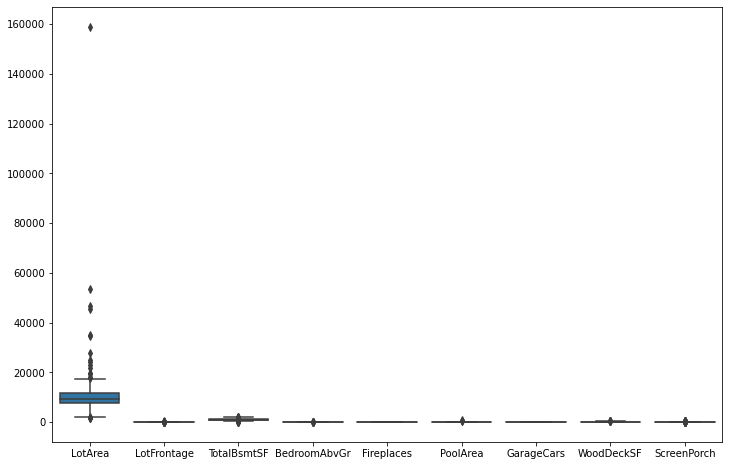

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_test_num)
plt.show();

In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1436 to 914
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       292 non-null    int64  
 1   LotFrontage   233 non-null    float64
 2   TotalBsmtSF   292 non-null    int64  
 3   BedroomAbvGr  292 non-null    int64  
 4   Fireplaces    292 non-null    int64  
 5   PoolArea      292 non-null    int64  
 6   GarageCars    292 non-null    int64  
 7   WoodDeckSF    292 non-null    int64  
 8   ScreenPorch   292 non-null    int64  
 9   MSZoning      292 non-null    object 
 10  Condition1    292 non-null    object 
 11  Heating       292 non-null    object 
 12  Street        292 non-null    object 
 13  CentralAir    292 non-null    object 
 14  Foundation    292 non-null    object 
 15  ExterQual     292 non-null    object 
 16  ExterCond     292 non-null    object 
 17  BsmtQual      286 non-null    object 
 18  BsmtCond      286 non-null 

In [49]:
X_test_ord = X_test.iloc[:, 15:]
X_test_ord

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu
1436,TA,TA,TA,TA,No,ALQ,TA,NaN
57,Gd,TA,Gd,TA,No,Unf,Gd,NaN
780,TA,TA,Gd,Gd,No,Unf,TA,TA
382,Gd,TA,Gd,TA,Av,Unf,Gd,NaN
1170,TA,TA,TA,TA,Av,ALQ,TA,Po
...,...,...,...,...,...,...,...,...
1328,Gd,Gd,Gd,TA,No,LwQ,TA,TA
1033,Gd,TA,Gd,TA,No,GLQ,Gd,NaN
977,Gd,TA,Gd,TA,No,GLQ,Gd,NaN
661,Gd,TA,Gd,Gd,No,GLQ,Gd,TA


In [50]:
X_test_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1436 to 914
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ExterQual     292 non-null    object
 1   ExterCond     292 non-null    object
 2   BsmtQual      286 non-null    object
 3   BsmtCond      286 non-null    object
 4   BsmtExposure  286 non-null    object
 5   BsmtFinType1  286 non-null    object
 6   KitchenQual   292 non-null    object
 7   FireplaceQu   155 non-null    object
dtypes: object(8)
memory usage: 20.5+ KB


In [58]:
X_test_ord.ExterCond.value_counts()

TA    258
Gd     25
Fa      7
Po      1
Ex      1
Name: ExterCond, dtype: int64

In [59]:
X_test_onehot = X_test.iloc[:, 9:15]
X_test_onehot

,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
1436,RL,Norm,GasA,Pave,Y,PConc
57,RL,Norm,GasA,Pave,Y,PConc
780,RL,Norm,GasA,Pave,Y,PConc
382,RL,Norm,GasA,Pave,Y,PConc
1170,RL,Norm,GasA,Pave,Y,CBlock
...,...,...,...,...,...,...
1328,RM,Norm,GasW,Pave,Y,BrkTil
1033,RL,Norm,GasA,Pave,Y,PConc
977,FV,Norm,GasA,Pave,Y,PConc
661,RL,Norm,GasA,Pave,Y,PConc


In [60]:
X_test_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 1436 to 914
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MSZoning    292 non-null    object
 1   Condition1  292 non-null    object
 2   Heating     292 non-null    object
 3   Street      292 non-null    object
 4   CentralAir  292 non-null    object
 5   Foundation  292 non-null    object
dtypes: object(6)
memory usage: 16.0+ KB


In [63]:
X_test_onehot.Heating.value_counts()

GasA    288
Grav      2
GasW      2
Name: Heating, dtype: int64

In [64]:
X_test_onehot.Foundation.value_counts()

CBlock    135
PConc     126
BrkTil     23
Slab        5
Stone       3
Name: Foundation, dtype: int64

In [65]:
X_test = pd.concat([X_test_num, X_test_ord, X_test_onehot], axis=1)
X_test

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,ExterQual,...,BsmtExposure,BsmtFinType1,KitchenQual,FireplaceQu,MSZoning,Condition1,Heating,Street,CentralAir,Foundation
1436,9000,60.0,864,3,0,0,2,0,0,TA,...,No,ALQ,TA,NaN,RL,Norm,GasA,Pave,Y,PConc
57,11645,89.0,860,3,0,0,2,0,0,Gd,...,No,Unf,Gd,NaN,RL,Norm,GasA,Pave,Y,PConc
780,7875,63.0,1237,3,1,0,2,220,0,TA,...,No,Unf,TA,TA,RL,Norm,GasA,Pave,Y,PConc
382,9245,79.0,939,3,0,0,2,144,0,Gd,...,Av,Unf,Gd,NaN,RL,Norm,GasA,Pave,Y,PConc
1170,9880,76.0,1096,3,1,576,1,203,0,TA,...,Av,ALQ,TA,Po,RL,Norm,GasA,Pave,Y,CBlock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,10440,60.0,1510,5,2,0,2,0,480,Gd,...,No,LwQ,TA,TA,RM,Norm,GasW,Pave,Y,BrkTil
1033,8125,NaN,1654,3,0,0,3,0,0,Gd,...,No,GLQ,Gd,NaN,RL,Norm,GasA,Pave,Y,PConc
977,4274,35.0,1241,1,0,0,2,0,0,Gd,...,No,GLQ,Gd,NaN,FV,Norm,GasA,Pave,Y,PConc
661,46589,52.0,1629,4,1,0,3,517,0,Gd,...,No,GLQ,Gd,TA,RL,Norm,GasA,Pave,Y,PConc


In [66]:
y_test_pred = search.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0], dtype=int64)

In [67]:
accuracy_score(y_test, y_test_pred)

0.952054794520548

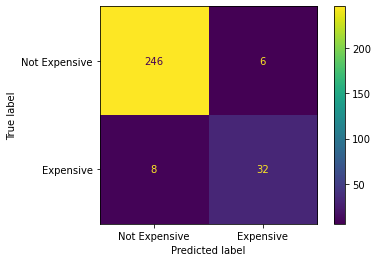

In [69]:
ConfusionMatrixDisplay.from_estimator(search, 
                                      X_test, 
                                      y_test, 
                                      display_labels=['Not Expensive', 'Expensive']);